No matches found.
No matches found.
No matches found.
No matches found.
No matches found.
No matches found.
CCO


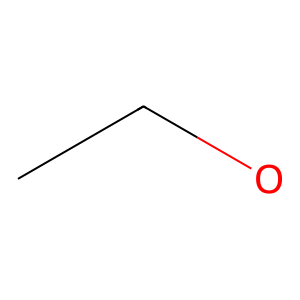

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
from rdkit.Chem import AllChem

substructure = Chem.MolFromSmiles('Cl')
ethanol=Chem.MolFromSmiles('CCO')
glucose=Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O')
methanol=Chem.MolFromSmiles('CO')
anisole = Chem.MolFromSmiles('COc1ccccc1')
caffeine = Chem.MolFromSmiles('Cn1cnc2c1c(=O)n(C)c(=O)n2C')
paracetamol = Chem.MolFromSmiles('CC(=O)Nc1ccc(cc1)O')
m =Chem.MolFromSmiles('CCCl')

query = [ethanol, glucose, methanol, anisole,caffeine,paracetamol,m]
def check(list):
    rep = Chem.MolFromSmarts("[O;H]")
    for mol in list:
        if mol.HasSubstructMatch(substructure):
            y= AllChem.ReplaceSubstructs(mol, substructure,rep)[0]
            print(Chem.MolToSmiles(y))
            img = Draw.MolToImage(y)
            display(img)
        else:                                                                                
            print("No matches found.")
       

check(query)

Num of atoms: 7
7


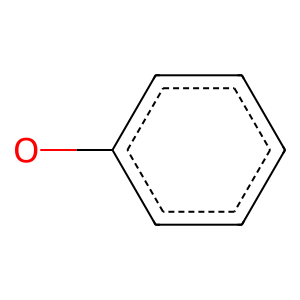

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display
from rdkit.Chem import rdFMCS
acetaminophen = Chem.MolFromSmiles('CC(=O)Nc1ccc(cc1)O')
phenacetin = Chem.MolFromSmiles('CCOC1=CC=C(C=C1)NC(=O)C')
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
m = [acetaminophen,phenacetin,aspirin]
res= rdFMCS.FindMCS(m)
print(f"Num of atoms: {res.numAtoms}")
print(res.numBonds)
mol = Chem.MolFromSmarts(res.smartsString)
img = Draw.MolToImage(mol)
display(img)

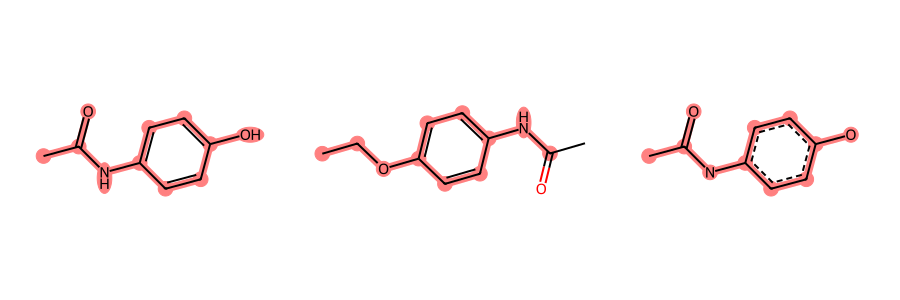

In [3]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

smiles_caffeine = "CC(=O)Nc1ccc(cc1)O"
smiles_theophylline = "CCOC1=CC=C(C=C1)NC(=O)C"

mol_caffeine = Chem.MolFromSmiles(smiles_caffeine)
mol_theophylline = Chem.MolFromSmiles(smiles_theophylline)

mcs_result = rdFMCS.FindMCS([mol_caffeine, mol_theophylline])

mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

# Generate 2D coordinates for the molecules and MCS
AllChem.Compute2DCoords(mol_caffeine)
AllChem.Compute2DCoords(mol_theophylline)
AllChem.Compute2DCoords(mcs_mol)

# Extract the common atoms from the MCS to highlight them
mcs_atoms = [atom.GetIdx() for atom in mcs_mol.GetAtoms()]

# Prepare highlightAtomLists for each molecule
highlight_atoms_caffeine = [atom.GetIdx() for atom in mol_caffeine.GetAtoms() if atom.GetIdx() in mcs_atoms]
highlight_atoms_theophylline = [atom.GetIdx() for atom in mol_theophylline.GetAtoms() if atom.GetIdx() in mcs_atoms]

# pass the correct highlightAtomLists for each molecule
highlight_atom_lists = [highlight_atoms_caffeine, highlight_atoms_theophylline, mcs_atoms]

# Draw the molecules with the MCS highlighted
img = Draw.MolsToGridImage(
    [mol_caffeine, mol_theophylline, mcs_mol],
    molsPerRow=3,
    subImgSize=(300, 300),
    highlightAtomLists=highlight_atom_lists,
)


display(img)

True
True
True
Number of matches found: 1
Match details: ((4, 5, 6, 7, 8, 9),)


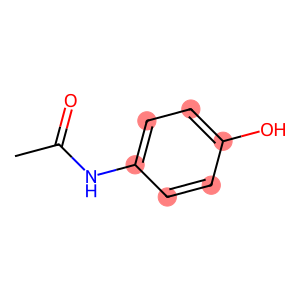

Number of matches found: 1
Match details: ((3, 4, 5, 6, 7, 8),)


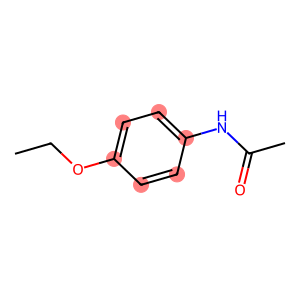

Number of matches found: 1
Match details: ((4, 5, 6, 7, 8, 9),)


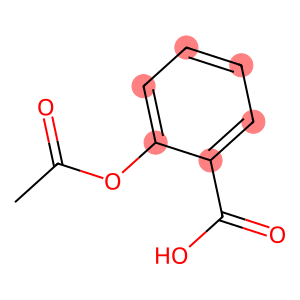

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

acetaminophen = Chem.MolFromSmiles('CC(=O)Nc1ccc(cc1)O')
phenacetin = Chem.MolFromSmiles('CCOC1=CC=C(C=C1)NC(=O)C')
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
struc =Chem.MolFromSmarts("c1ccccc1")
mols = [acetaminophen,phenacetin,aspirin]

# Check if substructure is present 
for mol in mols:
    print(mol.HasSubstructMatch(struc))

# Get the substructure match 
for mol in mols:
    if mol is not None:  
        matches = mol.GetSubstructMatches(struc)  # use matches to find all matches
        print(f"Number of matches found: {len(matches)}")  
        print("Match details:", matches)

        # Highlight the atoms in matches
        highlight_atoms = [atom for match in matches for atom in match]
        img = Draw.MolToImage(mol, highlightAtoms=highlight_atoms)
        display(img)

Number of stereochemistry-based matches: 2
Match details: ((0, 1, 2), (3, 1, 2))


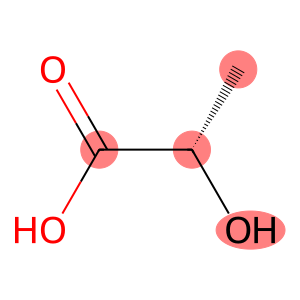

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

mol = Chem.MolFromSmiles("C[C@H](O)C(=O)O")  
substructure = Chem.MolFromSmarts("C[C@H](O)")

# stereochemistry-aware substructure match
matches = mol.GetSubstructMatches(substructure, useChirality=True)

print(f"Number of stereochemistry-based matches: {len(matches)}")
print("Match details:", matches)

highlight_atoms = [atom for match in matches for atom in match]
img = Draw.MolToImage(mol, highlightAtoms=highlight_atoms)
display(img)
